## **Objectif de ce Notebook**  
Ce notebook fait partie d'un ensemble de sous-projets dont le resultat représente le **projet Rakuten** que j'ai réalisé pour mon diplôme de data Scientist chez Datascientest.com.  

Ce repositery est la partie **Réseaux convolutifs** et ne traite que de la partie image.  
Il fait suite aux parties **Machine Learning**  et **Réseaux de Neurones Récurrents**  .
Il utilise la bibliothèque **Bibli_DataScience** commune à l'ensemble du projet et la bibbliothèque **CNN_DataScience.py** propre à cette partie.  
Un dernier dépot viendra, à savoir  une syntèse par le media Streamlit.


J'ai construit tout le code sur un modèle objet.
Chaque modèle est une classe et hérite d'une classe générale **DS_CNN**    

Modèles Utilisés : Dans ce projet j'utilise plusieurs architectures de CNN pré-entraînées reconnues pour leu performances :  
 
* **EfficientNetB1** : Un modèle optimisé pour un compromis idéal entre précision et efficacitcomputationnelleel -> classe **DS_EfficientNetB1**.
* **VGG16** et **VGG19** : Connus pour leur simplicité et profondeur, permettant des performances solides sur des tâches variées -> classes **DS_VGG16** et **DS_VGG19**
* **Inception** (GoogLeNet) : Célèbre pour son architecture innovante qui utilise les modules d'inception de GoogLeNet pour capturer des caractéristiques à différentes échelles-> classe **DS_INCEPTION**
* **ResNet50** : Un modèle résiduel (cf Kaiming He) qui permet de créer des réseaux profonds sans problème de gradient, connu pour ses excellentes performances -> classe **DS_RESNET50**
* **Xception** : Une version améliorée de l'Inception qui utilise des convolutions séparables en profondeur pour une meilleure efficacité -> classe **DS_Xception**

#### Importation des bibliothèques
Si une carte graphique est présente, la configuration GPU est effectuée pour s'assurer que le modèle  
utilise efficacement les ressources matérielles disponibles.  

In [1]:
import numpy as np
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')

if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

    

1 Physical GPUs, 1 Logical GPUs


###  Modèle EfficientNetB1

#### Chargement des Modules Personnalisés
On ajoute un chemin vers les modules personnalisés (Bibli_DataScience_3_2, CNN_DataScience_2) pour charger des fonctions ou classes spécifiques nécessaires à l'analyse.

In [2]:
import sys
sys.path.append('../src')
import Bibli_DataScience_3_2 as ds
import CNN_DataScience_2 as cnn

section :  ['DOSSIER', 'FICHIER']


#### **EfficientNetB1** : instanciation de DS_EfficientNetB1

DOSSIER_IMAGES_TRAIN
D:/Manuel/PROJET/Rakuten_Images_Classification_TensorFlow/data/images/image_train/
['D:/Manuel/PROJET/Rakuten_Images_Classification_TensorFlow/data/images/image_train/image_1263597046_product_3804725264.jpg']
Test lecture image
D:/Manuel/PROJET/Rakuten_Images_Classification_TensorFlow/data/images/image_train/image_1263597046_product_3804725264.jpg
Taille de l'image : (500, 500, 3)


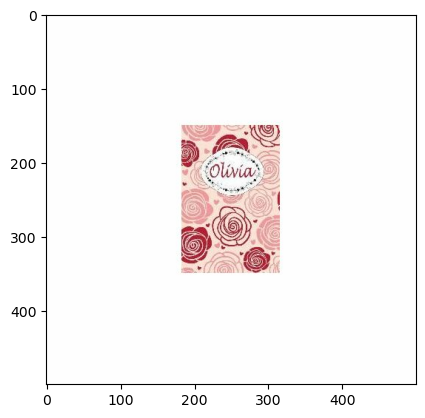

In [6]:
EffB1 = cnn.DS_EfficientNetB1("EfficientNetB1")

#### **EfficientNetB1** : Lancement de l'entrainement
Récupération des Poids du Modèle, des précisions, des pertes et des prédictions.

In [4]:
train_acc,val_acc,tloss,tvalloss = EffB1.fit_modele(20,True,0,Train='Save')

Train_Test_Split_1
Train_Test_Split_2 83256    1280
16434    2522
35273    2585
8620     2585
22499    1300
Name: prdtypecode, dtype: int64
(67932,)
(16984,)
Ramdom under sampling : MAX  5000
y :  (67932,)
Répartition :
{2583: 5000, 1560: 4058, 1300: 4036, 2060: 3994, 2522: 3991, 1280: 3896, 2403: 3819, 2280: 3808, 1920: 3442, 1160: 3162, 1320: 2593, 10: 2493, 2705: 2209, 1140: 2137, 2582: 2071, 40: 2006, 2585: 1997, 1302: 1993, 1281: 1656, 50: 1345, 2462: 1137, 2905: 698, 60: 666, 2220: 659, 1301: 646, 1940: 642, 1180: 611}
64765
64765
Ramdom over sampling : MIN  2000
Répartition :
{2583: 5000, 1560: 4058, 1300: 4036, 2060: 3994, 2522: 3991, 1280: 3896, 2403: 3819, 2280: 3808, 1920: 3442, 1160: 3162, 1320: 2593, 10: 2493, 2705: 2209, 1140: 2137, 2582: 2071, 40: 2006, 2585: 2000, 1302: 2000, 1281: 2000, 50: 2000, 2462: 2000, 2905: 2000, 60: 2000, 2220: 2000, 1301: 2000, 1940: 2000, 1180: 2000}
Sauvegarde de jeu d'entrainement


E:\Users\shaky\anaconda3\envs\tfdml_plugin\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


(74715, 27)
(16984, 27)
Sauvegarde de jeu pour la concatenation
Epoch 1/20
4670/4670 [==============================] - 2803s 597ms/step - loss: 2.0690 - accuracy: 0.4132 - val_loss: 1.4164 - val_accuracy: 0.5841 - lr: 1.0000e-04
Epoch 2/20
4670/4670 [==============================] - 2932s 628ms/step - loss: 1.5566 - accuracy: 0.5422 - val_loss: 1.3216 - val_accuracy: 0.6165 - lr: 1.0000e-04
Epoch 3/20
4670/4670 [==============================] - 2810s 602ms/step - loss: 1.3305 - accuracy: 0.5995 - val_loss: 1.2897 - val_accuracy: 0.6301 - lr: 1.0000e-04
Epoch 4/20
4670/4670 [==============================] - 2787s 597ms/step - loss: 1.1722 - accuracy: 0.6410 - val_loss: 1.2792 - val_accuracy: 0.6439 - lr: 1.0000e-04
Epoch 5/20
4670/4670 [==============================] - 2788s 597ms/step - loss: 1.0432 - accuracy: 0.6762 - val_loss: 1.2831 - val_accuracy: 0.6445 - lr: 1.0000e-04
Epoch 6/20
4670/4670 [==============================] - 2789s 597ms/step - loss: 0.9345 - accuracy: 0.7061

#### **EfficientNetB1** : Optionnel : Récupération des données

In [ ]:
"""

train_acc,val_acc,tloss,tvalloss = test.restore_fit_arrays()
y_orig,y_pred = test.restore_predict_arrays()
df_pred = test.restore_predict_dataframe()
"""

#### **EfficientNetB1** : Affichage des precisions et des pertes par époque

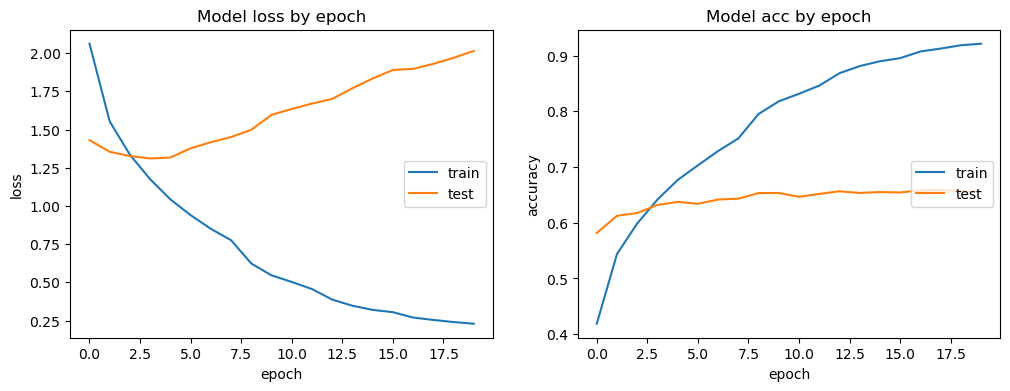

In [6]:
ds.plot_fit(train_acc,val_acc,tloss,tvalloss)

#### **EfficientNetB1** : Affichage des 3 meilleurs prédictions par catégorie

In [7]:
df_pred = EffB1.get_df_pred()
df_pred

,Categorie,predict,pourc,predict2,pourc2,predict3,pourc3
0,10,10,0.462279,2705,0.194222,2403,0.149278
1,40,40,0.517928,2905,0.093625,2462,0.087649
2,50,50,0.443452,1300,0.086310,60,0.056548
3,60,60,0.819277,2462,0.048193,50,0.042169
4,1140,1140,0.647940,1280,0.099251,1300,0.029963
5,1160,1160,0.945638,2403,0.011378,1280,0.006321
6,1180,1180,0.490196,1281,0.098039,1140,0.084967
7,1280,1280,0.420945,1300,0.169405,1281,0.072895
8,1281,1281,0.342995,1280,0.171498,2403,0.079710
9,1300,1300,0.824579,1280,0.061447,1302,0.017839


#### **EfficientNetB1** :  Évaluation des Prédictions - Rapport de classification
Ce rapport inclut des métriques comme la précision, le rappel (recall), le score F1 et le support pour chaque classe individuelle :  

1. Précision (**Precision**) : le nombre de positifs bien prédit (Vrai Positif) divisé par l’ensemble des positifs prédit (Vrai Positif + Faux Positif)
2. Rappel (**Recall**) : le nombre de positifs bien prédit (Vrai Positif) divisé par l’ensemble des positifs (Vrai Positif + Faux Négatif)
3. **Score F1** : La moyenne harmonique de la précision et du rappel, fournissant une évaluation relativement correct de la performance de notre modèle
4. **Support** : Le nombre d'occurrences réelles de chaque classe dans l'ensemble de test.

In [8]:
y_orig = EffB1.get_y_orig()
y_pred = EffB1.get_y_pred()
_,_ = ds.get_classification_report(y_orig, y_pred)

Précision de la prédiction: 65.57348092322187 %
Evaluation détaillée de la Classification par RDF :
 
               precision    recall  f1-score   support

          10       0.57      0.46      0.51       623
          40       0.68      0.52      0.59       502
          50       0.54      0.44      0.49       336
          60       0.72      0.82      0.76       166
        1140       0.67      0.65      0.66       534
        1160       0.93      0.95      0.94       791
        1180       0.60      0.49      0.54       153
        1280       0.50      0.42      0.46       974
        1281       0.38      0.34      0.36       414
        1300       0.69      0.82      0.75      1009
        1301       0.53      0.70      0.60       161
        1302       0.47      0.54      0.50       498
        1320       0.55      0.52      0.53       648
        1560       0.58      0.59      0.59      1015
        1920       0.81      0.79      0.80       861
        1940       0.69      0.7

#### **EfficientNetB1** : Génération et Affichage de la Matrice de Confusion
1. La **matrice de confusion** fournit une représentation visuelle des performances du modèle, montrant non seulement les bonnes classifications  
mais aussi les erreurs (**faux positifs** et **faux négatifs**).  
2. En identifiant où le modèle a échoué (c.-à-d., les cellules non-diagonales de la matrice), on peut cibler les améliorations à apporter  
au modèle ou aux données d'entraînement.  
3. Analyser la matrice de confusion permet d'identifier des classes spécifiques qui sont souvent confondues, ce qui peut indiquer un besoin d'ajustement des caractéristiques d'entrée ou d'ajout de données supplémentaires pour ces classes.


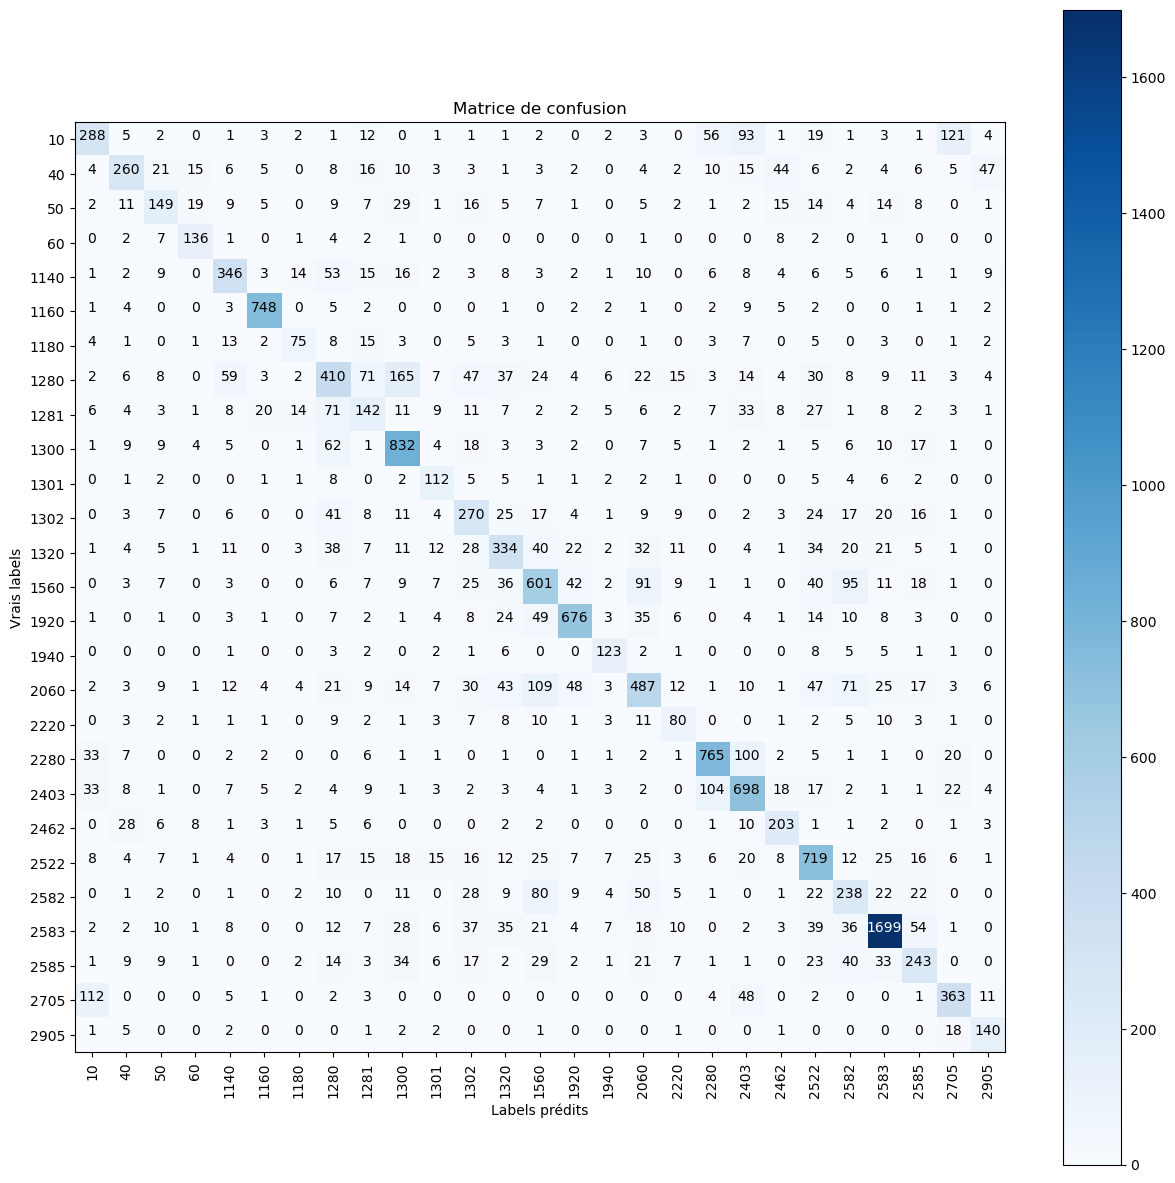

In [9]:
ds.show_confusion_matrix(y_orig, y_pred)

###  Modèle VGG16

#### Chargement des Modules Personnalisés
On ajoute un chemin vers les modules personnalisés (Bibli_DataScience_3_2, CNN_DataScience_2) pour charger des fonctions ou classes spécifiques nécessaires à l'analyse.

In [3]:
import Bibli_DataScience_3_2 as ds
import CNN_DataScience_2 as cnn

#### **vgg16** : instanciation de DS_VGG16

In [4]:
vgg16 = cnn.DS_VGG16("Mon_Modele_VGG16")

DOSSIER_IMAGES_TRAIN
D:/Manuel/PROJET/Rakuten_Images_Classification_TensorFlow/data/images/image_train/
['D:/Manuel/PROJET/Rakuten_Images_Classification_TensorFlow/data/images/image_train/image_1263597046_product_3804725264.jpg']


#### **vgg16** : Lancement de l'entrainement
Récupération des Poids du Modèle, des précisions, des pertes et des prédictions.

In [5]:
train_acc,val_acc,tloss,tvalloss = vgg16.fit_modele(40,True,15)

newfit
Train_Test_Split_1
Train_Test_Split_ 
['D:/Manuel/PROJET/Rakuten_Images_Classification_TensorFlow/data/images/image_train/image_1263597046_product_3804725264.jpg']
Train_Test_Split_2 83256    1280
16434    2522
35273    2585
8620     2585
22499    1300
Name: prdtypecode, dtype: int64
(67932,)
(16984,)
Ramdom under sampling : MAX  5000
y :  (67932,)
Répartition :
{2583: 5000, 1560: 4058, 1300: 4036, 2060: 3994, 2522: 3991, 1280: 3896, 2403: 3819, 2280: 3808, 1920: 3442, 1160: 3162, 1320: 2593, 10: 2493, 2705: 2209, 1140: 2137, 2582: 2071, 40: 2006, 2585: 1997, 1302: 1993, 1281: 1656, 50: 1345, 2462: 1137, 2905: 698, 60: 666, 2220: 659, 1301: 646, 1940: 642, 1180: 611}
64765
64765
Ramdom over sampling : MIN  2000
Répartition :
{2583: 5000, 1560: 4058, 1300: 4036, 2060: 3994, 2522: 3991, 1280: 3896, 2403: 3819, 2280: 3808, 1920: 3442, 1160: 3162, 1320: 2593, 10: 2493, 2705: 2209, 1140: 2137, 2582: 2071, 40: 2006, 2585: 2000, 1302: 2000, 1281: 2000, 50: 2000, 2462: 2000, 2905: 2000,

#### **vgg16** : Optionnel : Récupération des données

In [7]:
"""
train_acc,val_acc,tloss,tvalloss = vgg16.restore_fit_arrays()
y_orig,y_pred = vgg16.restore_predict_arrays()
df_pred = vgg16.restore_predict_dataframe()
"""



#### **vgg16** : Affichage des precisions et des pertes par époque

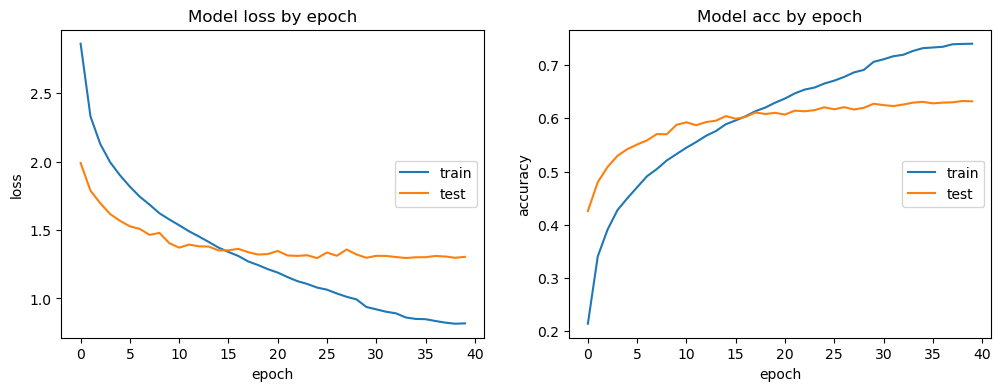

In [6]:
ds.plot_fit(train_acc,val_acc,tloss,tvalloss)

#### **vgg16** : Affichage des 3 meilleurs prédictions par catégorie

In [7]:
df_pred = vgg16.get_df_pred()
df_pred

,Categorie,predict,pourc,predict2,pourc2,predict3,pourc3
0,10,10,0.436597,2705,0.216693,2280,0.134831
1,40,40,0.531873,2905,0.085657,2462,0.075697
2,50,50,0.416667,1300,0.130952,60,0.071429
3,60,60,0.825301,2462,0.054217,50,0.036145
4,1140,1140,0.666667,1280,0.082397,1180,0.028090
5,1160,1160,0.930468,2403,0.012642,2462,0.011378
6,1180,1180,0.450980,1140,0.137255,1280,0.071895
7,1280,1280,0.387064,1300,0.188912,1140,0.098563
8,1281,1281,0.268116,1280,0.166667,2403,0.074879
9,1300,1300,0.830525,50,0.035679,1280,0.021804


### **vgg16** :  Évaluation des Prédictions - Rapport de classification
Ce rapport inclut des métriques comme la précision, le rappel (recall), le score F1 et le support pour chaque classe individuelle :  

1. Précision (**Precision**) : le nombre de positifs bien prédit (Vrai Positif) divisé par l’ensemble des positifs prédit (Vrai Positif + Faux Positif)
2. Rappel (**Recall**) : le nombre de positifs bien prédit (Vrai Positif) divisé par l’ensemble des positifs (Vrai Positif + Faux Négatif)
3. **Score F1** : La moyenne harmonique de la précision et du rappel, fournissant une évaluation relativement correct de la performance de notre modèle
4. **Support** : Le nombre d'occurrences réelles de chaque classe dans l'ensemble de test.

In [8]:
y_orig = vgg16.get_y_orig()
y_pred = vgg16.get_y_pred()
_,_ = ds.get_classification_report(y_orig, y_pred)

Précision de la prédiction: 63.1888836552049 %
Evaluation détaillée de la Classification par RDF :
 
               precision    recall  f1-score   support

          10       0.58      0.44      0.50       623
          40       0.71      0.53      0.61       502
          50       0.37      0.42      0.39       336
          60       0.66      0.83      0.73       166
        1140       0.56      0.67      0.61       534
        1160       0.89      0.93      0.91       791
        1180       0.43      0.45      0.44       153
        1280       0.46      0.39      0.42       974
        1281       0.38      0.27      0.32       414
        1300       0.62      0.83      0.71      1009
        1301       0.60      0.60      0.60       161
        1302       0.45      0.36      0.40       498
        1320       0.48      0.43      0.45       648
        1560       0.58      0.59      0.59      1015
        1920       0.80      0.79      0.80       861
        1940       0.56      0.73

#### **vgg16** : Génération et Affichage de la Matrice de Confusion
1. La **matrice de confusion** fournit une représentation visuelle des performances du modèle, montrant non seulement les bonnes classifications  
mais aussi les erreurs (**faux positifs** et **faux négatifs**).  
2. En identifiant où le modèle a échoué (c.-à-d., les cellules non-diagonales de la matrice), on peut cibler les améliorations à apporter  
au modèle ou aux données d'entraînement.  
3. Analyser la matrice de confusion permet d'identifier des classes spécifiques qui sont souvent confondues, ce qui peut indiquer un besoin d'ajustement des caractéristiques d'entrée ou d'ajout de données supplémentaires pour ces classes.

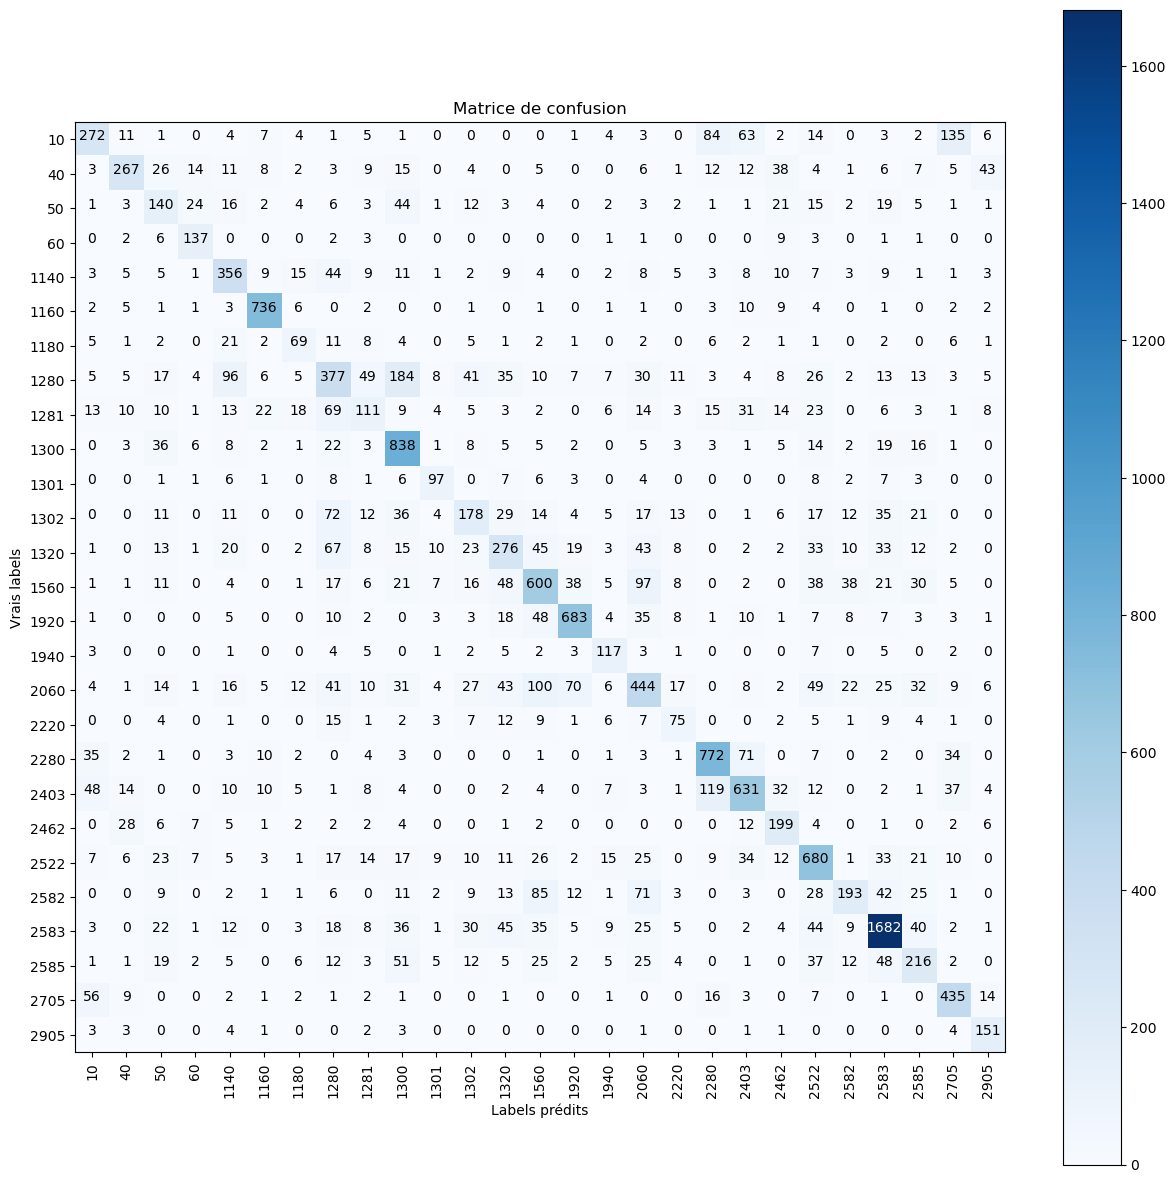

In [9]:
ds.show_confusion_matrix(y_orig, y_pred)

In [11]:
ds.ajout_REPORT_40_VALACC(val_acc,vgg16.get_MODELE(),vgg16.get_LIBBELLE(),vgg16.get_CNN())
ds.ajout_REPORT_40_ACC(train_acc,vgg16.get_MODELE(),vgg16.get_LIBBELLE(),vgg16.get_CNN())
ds.ajout_REPORT_40_PRED(y_orig, y_pred,vgg16.get_MODELE(),vgg16.get_LIBBELLE(),vgg16.get_CNN())
print(vgg16.get_CNN())
print(vgg16.get_LIBBELLE())

CNN30
INCEPTON 5000-2000 SIZE400 DEFREEZE  DR30-CC1024-NORM-CC1024-DR40


###  Modèle  INCEPTION

#### Chargement des Modules Personnalisés
On ajoute un chemin vers les modules personnalisés (Bibli_DataScience_3_2, CNN_DataScience_2) pour charger des fonctions ou classes spécifiques nécessaires à l'analyse.

In [5]:
import Bibli_DataScience_3_2 as ds
import CNN_DataScience_2 as cnn
#import imp
#imp.reload(ds)
#imp.reload(cnn)

section :  ['DOSSIER', 'FICHIER']


C:\Users\shaky\AppData\Local\Temp\ipykernel_9904\3882446202.py:3: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp


<module 'CNN_DataScience_2' from 'D:\\Manuel\\PROJET\\Rakuten_Images_Classification_TensorFlow\\notebooks\\../src\\CNN_DataScience_2.py'>

#### **INCEPTION** : instanciation de DS_INCEPTION

In [6]:
incep = cnn.DS_INCEPTION("Mon_Modele_INCEPTION")

DOSSIER_IMAGES_TRAIN
D:/Manuel/PROJET/Rakuten_Images_Classification_TensorFlow/data/images/image_train/
['D:/Manuel/PROJET/Rakuten_Images_Classification_TensorFlow/data/images/image_train/image_1263597046_product_3804725264.jpg']
87910968/87910968 [==============================] - 9s 0us/step


#### **INCEPTION** : Optionnel : Récupération des données

In [6]:
"""
train_acc,val_acc,tloss,tvalloss = incep.restore_fit_arrays()
y_orig,y_pred = incep.restore_predict_arrays()
df_pred = incep.restore_predict_dataframe()


"""



#### **INCEPTION** : Lancement de l'entrainement
Récupération des Poids du Modèle, des précisions, des pertes et des prédictions.

In [7]:
train_acc,val_acc,tloss,tvalloss = incep.fit_modele(20,True,0,Train='Save')

newfit
Train_Test_Split_1
Train_Test_Split_ 
['D:/Manuel/PROJET/Rakuten_Images_Classification_TensorFlow/data/images/image_train/image_1263597046_product_3804725264.jpg']
Train_Test_Split_2 83256    1280
16434    2522
35273    2585
8620     2585
22499    1300
Name: prdtypecode, dtype: int64
(67932,)
(16984,)
[['D:/Manuel/PROJET/Rakuten_Images_Classification_TensorFlow/data/images/image_train/image_1317688530_product_4213200252.jpg']
 ['D:/Manuel/PROJET/Rakuten_Images_Classification_TensorFlow/data/images/image_train/image_1308945838_product_4177869038.jpg']
 ['D:/Manuel/PROJET/Rakuten_Images_Classification_TensorFlow/data/images/image_train/image_1059967925_product_1093784151.jpg']
 ['D:/Manuel/PROJET/Rakuten_Images_Classification_TensorFlow/data/images/image_train/image_1317006847_product_4211512375.jpg']
 ['D:/Manuel/PROJET/Rakuten_Images_Classification_TensorFlow/data/images/image_train/image_952639056_product_216196079.jpg']]
Ramdom under sampling : MAX  5000
y :  (67932,)
Répartit

#### **INCEPTION** : Affichage des precisions et des pertes par époque

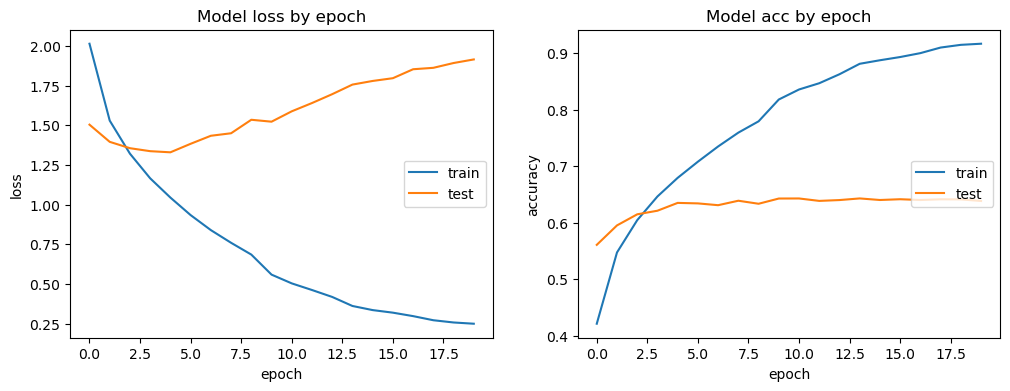

In [8]:
ds.plot_fit(train_acc,val_acc,tloss,tvalloss)

#### **INCEPTION** : Affichage des 3 meilleurs prédictions par catégorie

In [9]:
df_pred = incep.get_df_pred()
df_pred

,Categorie,predict,pourc,predict2,pourc2,predict3,pourc3
0,10,10,0.451043,2705,0.253612,2280,0.109149
1,40,40,0.440239,2905,0.155378,2462,0.077689
2,50,50,0.467262,1300,0.083333,1280,0.062500
3,60,60,0.777108,50,0.066265,2462,0.042169
4,1140,1140,0.602996,1280,0.119850,1180,0.059925
5,1160,1160,0.925411,2462,0.012642,2403,0.011378
6,1180,1180,0.490196,1140,0.091503,1281,0.065359
7,1280,1280,0.422998,1300,0.170431,1281,0.064682
8,1281,1281,0.272947,1280,0.195652,2403,0.062802
9,1300,1300,0.778989,1280,0.082260,2585,0.018831


### **INCEPTION** :  Évaluation des Prédictions - Rapport de classification
Ce rapport inclut des métriques comme la précision, le rappel (recall), le score F1 et le support pour chaque classe individuelle :  

1. Précision (**Precision**) : le nombre de positifs bien prédit (Vrai Positif) divisé par l’ensemble des positifs prédit (Vrai Positif + Faux Positif)
2. Rappel (**Recall**) : le nombre de positifs bien prédit (Vrai Positif) divisé par l’ensemble des positifs (Vrai Positif + Faux Négatif)
3. **Score F1** : La moyenne harmonique de la précision et du rappel, fournissant une évaluation relativement correct de la performance de notre modèle
4. **Support** : Le nombre d'occurrences réelles de chaque classe dans l'ensemble de test.

In [10]:
y_orig = incep.get_y_orig()
y_pred = incep.get_y_pred()
_,_ = ds.get_classification_report(y_orig, y_pred)

Précision de la prédiction: 63.842439943476215 %
Evaluation détaillée de la Classification par RDF :
 
               precision    recall  f1-score   support

          10       0.51      0.45      0.48       623
          40       0.63      0.44      0.52       502
          50       0.47      0.47      0.47       336
          60       0.71      0.78      0.74       166
        1140       0.60      0.60      0.60       534
        1160       0.92      0.93      0.92       791
        1180       0.45      0.49      0.47       153
        1280       0.44      0.42      0.43       974
        1281       0.33      0.27      0.30       414
        1300       0.68      0.78      0.73      1009
        1301       0.61      0.66      0.64       161
        1302       0.49      0.52      0.50       498
        1320       0.53      0.48      0.50       648
        1560       0.60      0.60      0.60      1015
        1920       0.80      0.79      0.79       861
        1940       0.78      0.

#### **INCEPTION** : Génération et Affichage de la Matrice de Confusion
1. La **matrice de confusion** fournit une représentation visuelle des performances du modèle, montrant non seulement les bonnes classifications  
mais aussi les erreurs (**faux positifs** et **faux négatifs**).  
2. En identifiant où le modèle a échoué (c.-à-d., les cellules non-diagonales de la matrice), on peut cibler les améliorations à apporter  
au modèle ou aux données d'entraînement.  
3. Analyser la matrice de confusion permet d'identifier des classes spécifiques qui sont souvent confondues, ce qui peut indiquer un besoin d'ajustement des caractéristiques d'entrée ou d'ajout de données supplémentaires pour ces classes.

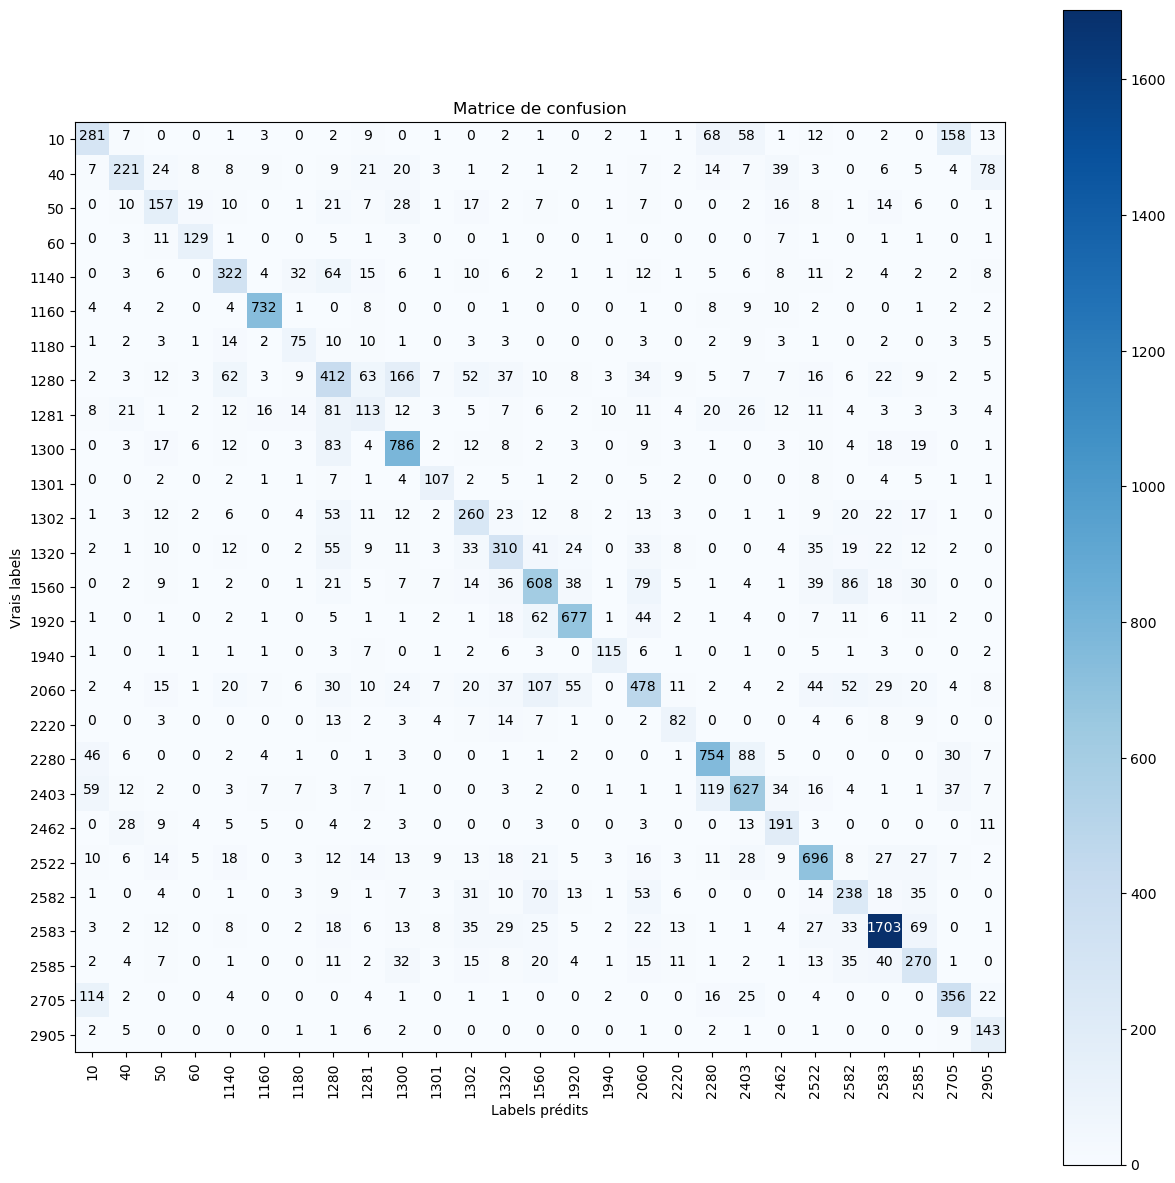

In [11]:
ds.show_confusion_matrix(y_orig, y_pred)

###  Modèle  RESNET50

#### Chargement des Modules Personnalisés
On ajoute un chemin vers les modules personnalisés (Bibli_DataScience_3_2, CNN_DataScience_2) pour charger des fonctions ou classes spécifiques nécessaires à l'analyse.

In [13]:
import sys
sys.path.append('../src')
import Bibli_DataScience_3_2 as ds
import CNN_DataScience_2 as cnn


In [ ]:
import imp
imp.reload(ds)
imp.reload(cnn)

#### **RESNET50** : instanciation de DS_RESNET50

In [4]:
resnet=cnn.DS_RESNET50("RESNET50")

DOSSIER_IMAGES_TRAIN
D:/Manuel/PROJET/Rakuten_Images_Classification_TensorFlow/data/images/image_train/
['D:/Manuel/PROJET/Rakuten_Images_Classification_TensorFlow/data/images/image_train/image_1263597046_product_3804725264.jpg']


#### **RESNET50** : Lancement de l'entrainement
Récupération des Poids du Modèle, des précisions, des pertes et des prédictions.

In [5]:
train_acc,val_acc,tloss,tvalloss = resnet.fit_modele(20,True,0,Train='Save')

newfit
Train_Test_Split_1
Train_Test_Split_ 
['D:/Manuel/PROJET/Rakuten_Images_Classification_TensorFlow/data/images/image_train/image_1263597046_product_3804725264.jpg']
Train_Test_Split_2 83256    1280
16434    2522
35273    2585
8620     2585
22499    1300
Name: prdtypecode, dtype: int64
(67932,)
(16984,)
Ramdom under sampling : MAX  5000
y :  (67932,)
Répartition :
{2583: 5000, 1560: 4058, 1300: 4036, 2060: 3994, 2522: 3991, 1280: 3896, 2403: 3819, 2280: 3808, 1920: 3442, 1160: 3162, 1320: 2593, 10: 2493, 2705: 2209, 1140: 2137, 2582: 2071, 40: 2006, 2585: 1997, 1302: 1993, 1281: 1656, 50: 1345, 2462: 1137, 2905: 698, 60: 666, 2220: 659, 1301: 646, 1940: 642, 1180: 611}
64765
64765
Ramdom over sampling : MIN  2000
Répartition :
{2583: 5000, 1560: 4058, 1300: 4036, 2060: 3994, 2522: 3991, 1280: 3896, 2403: 3819, 2280: 3808, 1920: 3442, 1160: 3162, 1320: 2593, 10: 2493, 2705: 2209, 1140: 2137, 2582: 2071, 40: 2006, 2585: 2000, 1302: 2000, 1281: 2000, 50: 2000, 2462: 2000, 2905: 2000,

#### **RESNET50** : Affichage des precisions et des pertes par époque

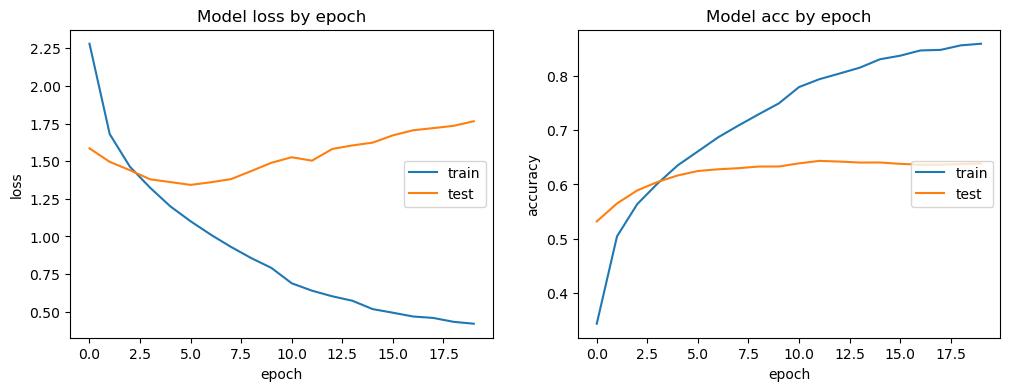

In [6]:
ds.plot_fit(train_acc,val_acc,tloss,tvalloss)

#### **RESNET50** : Affichage des 3 meilleurs prédictions par catégorie

In [7]:
df_pred = resnet.get_df_pred()
df_pred

,Categorie,predict,pourc,predict2,pourc2,predict3,pourc3
0,10,10,0.418941,2705,0.219904,2280,0.126806
1,40,40,0.486056,2462,0.093625,2905,0.085657
2,50,50,0.464286,1300,0.127976,2462,0.059524
3,60,60,0.777108,2462,0.060241,50,0.054217
4,1140,1140,0.601124,1280,0.129213,1180,0.043071
5,1160,1160,0.945638,2462,0.008850,1140,0.007585
6,1180,1180,0.431373,1281,0.098039,1140,0.091503
7,1280,1280,0.380903,1300,0.188912,1140,0.070842
8,1281,1281,0.306763,1280,0.164251,2403,0.053140
9,1300,1300,0.831516,1280,0.041625,50,0.024777


### **RESNET50** :  Évaluation des Prédictions - Rapport de classification
Ce rapport inclut des métriques comme la précision, le rappel (recall), le score F1 et le support pour chaque classe individuelle :  

1. Précision (**Precision**) : le nombre de positifs bien prédit (Vrai Positif) divisé par l’ensemble des positifs prédit (Vrai Positif + Faux Positif)
2. Rappel (**Recall**) : le nombre de positifs bien prédit (Vrai Positif) divisé par l’ensemble des positifs (Vrai Positif + Faux Négatif)
3. **Score F1** : La moyenne harmonique de la précision et du rappel, fournissant une évaluation relativement correct de la performance de notre modèle
4. **Support** : Le nombre d'occurrences réelles de chaque classe dans l'ensemble de test.

In [9]:
y_orig = resnet.get_y_orig()
y_pred = resnet.get_y_pred()
_,_ = ds.get_classification_report(y_orig, y_pred)

Précision de la prédiction: 63.848327837965144 %
Evaluation détaillée de la Classification par RDF :
 
               precision    recall  f1-score   support

          10       0.59      0.42      0.49       623
          40       0.71      0.49      0.58       502
          50       0.43      0.46      0.45       336
          60       0.70      0.78      0.74       166
        1140       0.61      0.60      0.60       534
        1160       0.89      0.95      0.92       791
        1180       0.40      0.43      0.42       153
        1280       0.46      0.38      0.42       974
        1281       0.36      0.31      0.33       414
        1300       0.63      0.83      0.72      1009
        1301       0.54      0.65      0.59       161
        1302       0.42      0.46      0.44       498
        1320       0.47      0.48      0.48       648
        1560       0.58      0.60      0.59      1015
        1920       0.80      0.79      0.79       861
        1940       0.61      0.

y_orig = resnet.get_y_orig()
y_pred = resnet.get_y_pred()
_,_ = ds.get_classification_report(y_orig, y_pred)

#### **RESNET50** : Génération et Affichage de la Matrice de Confusion
1. La **matrice de confusion** fournit une représentation visuelle des performances du modèle, montrant non seulement les bonnes classifications  
mais aussi les erreurs (**faux positifs** et **faux négatifs**).  
2. En identifiant où le modèle a échoué (c.-à-d., les cellules non-diagonales de la matrice), on peut cibler les améliorations à apporter  
au modèle ou aux données d'entraînement.  
3. Analyser la matrice de confusion permet d'identifier des classes spécifiques qui sont souvent confondues, ce qui peut indiquer un besoin d'ajustement des caractéristiques d'entrée ou d'ajout de données supplémentaires pour ces classes.

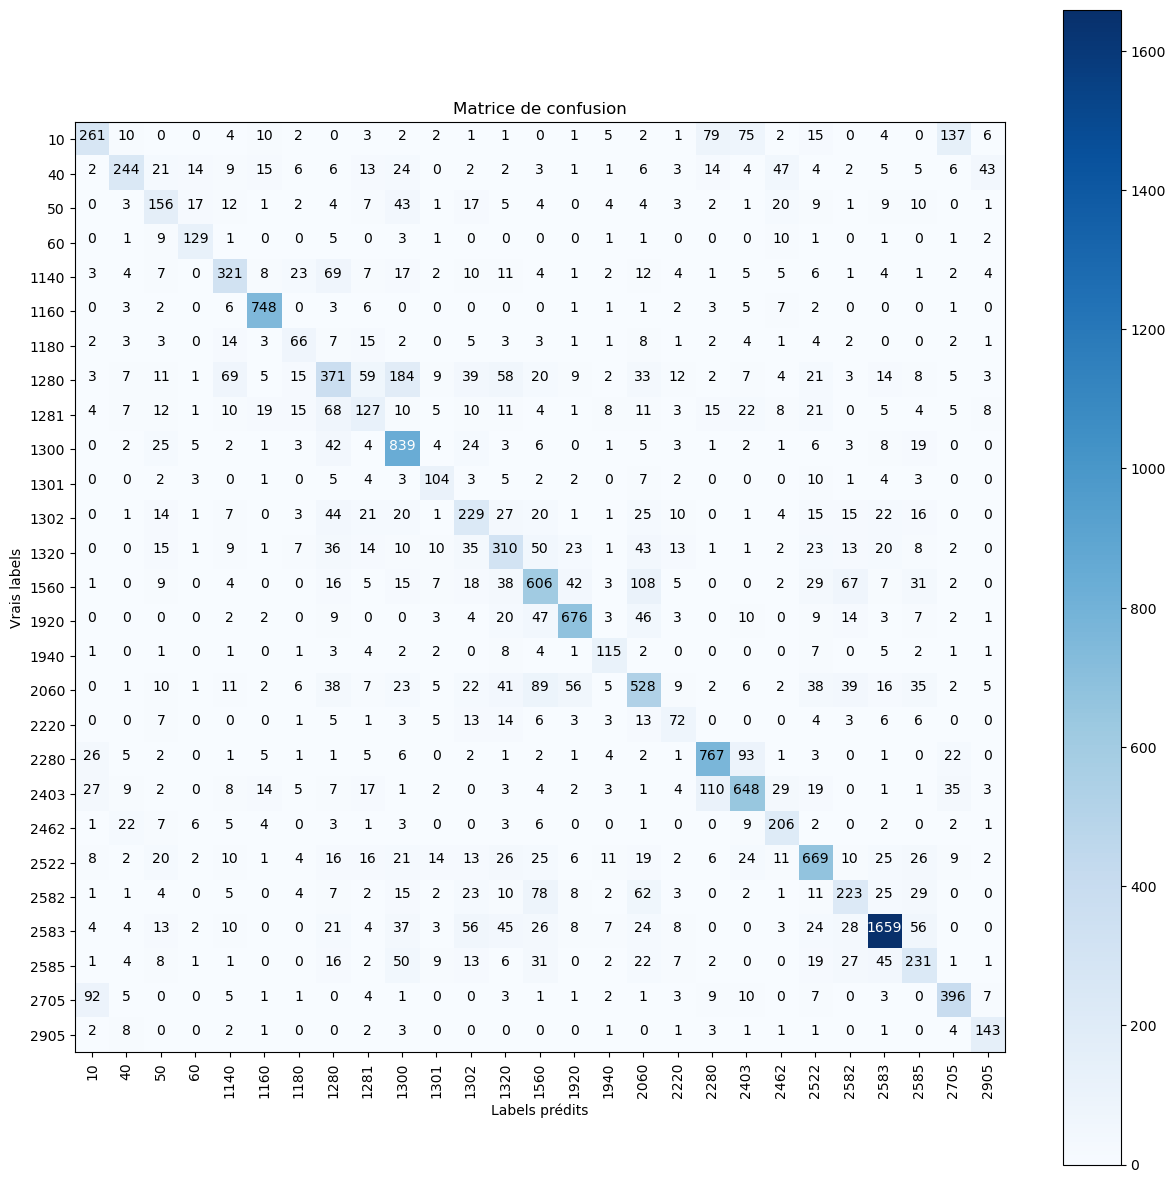

In [10]:
ds.show_confusion_matrix(y_orig, y_pred)

###  Modèle VGG19

#### Chargement des Modules Personnalisés
On ajoute un chemin vers les modules personnalisés (Bibli_DataScience_3_2, CNN_DataScience_2) pour charger des fonctions ou classes spécifiques nécessaires à l'analyse.

In [2]:
import Bibli_DataScience_3 as ds
import CNN_DataScience_2 as cnn
#import imp
#imp.reload(ds)
#imp.reload(cnn)

#### **VGG19** : instanciation de DS_VGG19

In [3]:
v19 = cnn.DS_VGG19("VGG19")

#### **VGG19** : Lancement de l'entrainement
Récupération des Poids du Modèle, des précisions, des pertes et des prédictions.

In [4]:
train_acc,val_acc,tloss,tvalloss = v19.fit_modele(20,True,0,Train='Save')

Train_Test_Split_1
Train_Test_Split_2 83256    1280
16434    2522
35273    2585
8620     2585
22499    1300
Name: prdtypecode, dtype: int64
(67932,)
(16984,)
Ramdom under sampling : MAX  5000
y :  (67932,)
Répartition :
{2583: 5000, 1560: 4058, 1300: 4036, 2060: 3994, 2522: 3991, 1280: 3896, 2403: 3819, 2280: 3808, 1920: 3442, 1160: 3162, 1320: 2593, 10: 2493, 2705: 2209, 1140: 2137, 2582: 2071, 40: 2006, 2585: 1997, 1302: 1993, 1281: 1656, 50: 1345, 2462: 1137, 2905: 698, 60: 666, 2220: 659, 1301: 646, 1940: 642, 1180: 611}
64765
64765
Ramdom over sampling : MIN  2000
Répartition :
{2583: 5000, 1560: 4058, 1300: 4036, 2060: 3994, 2522: 3991, 1280: 3896, 2403: 3819, 2280: 3808, 1920: 3442, 1160: 3162, 1320: 2593, 10: 2493, 2705: 2209, 1140: 2137, 2582: 2071, 40: 2006, 2585: 2000, 1302: 2000, 1281: 2000, 50: 2000, 2462: 2000, 2905: 2000, 60: 2000, 2220: 2000, 1301: 2000, 1940: 2000, 1180: 2000}
Sauvegarde de jeu d'entrainement
(74715, 27)
(16984, 27)


E:\Users\shaky\anaconda3\envs\tf\lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


il y a  22  couches sur ce modèle.
Sauvegarde de jeu pour la concatenation
Epoch 1/20
4670/4670 [==============================] - 5033s 1s/step - loss: 2.8292 - accuracy: 0.1972 - val_loss: 2.0852 - val_accuracy: 0.3932 - lr: 1.0000e-05
Epoch 2/20
4670/4670 [==============================] - 4731s 1s/step - loss: 2.1071 - accuracy: 0.3884 - val_loss: 1.8102 - val_accuracy: 0.4681 - lr: 1.0000e-05
Epoch 3/20
4670/4670 [==============================] - 4764s 1s/step - loss: 1.8556 - accuracy: 0.4561 - val_loss: 1.6319 - val_accuracy: 0.5173 - lr: 1.0000e-05
Epoch 4/20
4670/4670 [==============================] - 4747s 1s/step - loss: 1.7030 - accuracy: 0.4969 - val_loss: 1.5747 - val_accuracy: 0.5332 - lr: 1.0000e-05
Epoch 5/20
4670/4670 [==============================] - 4778s 1s/step - loss: 1.5814 - accuracy: 0.5289 - val_loss: 1.5529 - val_accuracy: 0.5384 - lr: 1.0000e-05
Epoch 6/20
4670/4670 [==============================] - 4762s 1s/step - loss: 1.4868 - accuracy: 0.5558 - val_

#### **VGG19** : Affichage des precisions et des pertes par époque

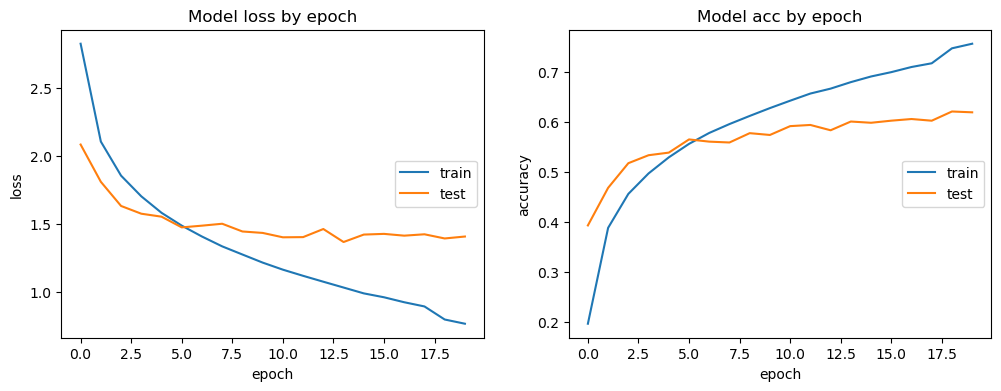

In [5]:
ds.plot_fit(train_acc,val_acc,tloss,tvalloss)

#### **VGG19** : Affichage des 3 meilleurs prédictions par catégorie

In [6]:
df_pred = v19.get_df_pred()
df_pred

,Unnamed: 0,Categorie,predict,pourc,predict2,pourc2,predict3,pourc3
0,0,10,10,0.515249,2705,0.187801,2280,0.101124
1,1,40,40,0.535857,2905,0.063745,2462,0.061753
2,2,50,50,0.559524,60,0.071429,1300,0.062500
3,3,60,60,0.837349,50,0.042169,40,0.036145
4,4,1140,1140,0.610487,1280,0.084270,1300,0.031835
5,5,1160,1160,0.941846,2403,0.010114,1281,0.010114
6,6,1180,1180,0.450980,1140,0.098039,1281,0.065359
7,7,1280,1280,0.371663,1300,0.168378,1140,0.084189
8,8,1281,1281,0.335749,1280,0.120773,2522,0.067633
9,9,1300,1300,0.766105,50,0.047572,1280,0.035679


### **VGG19** :  Évaluation des Prédictions - Rapport de classification
Ce rapport inclut des métriques comme la précision, le rappel (recall), le score F1 et le support pour chaque classe individuelle :  

1. Précision (**Precision**) : le nombre de positifs bien prédit (Vrai Positif) divisé par l’ensemble des positifs prédit (Vrai Positif + Faux Positif)
2. Rappel (**Recall**) : le nombre de positifs bien prédit (Vrai Positif) divisé par l’ensemble des positifs (Vrai Positif + Faux Négatif)
3. **Score F1** : La moyenne harmonique de la précision et du rappel, fournissant une évaluation relativement correct de la performance de notre modèle
4. **Support** : Le nombre d'occurrences réelles de chaque classe dans l'ensemble de test.

In [7]:
 y_orig = v19.get_y_orig()
y_pred = v19.get_y_pred()
_,_ = ds.get_classification_report(y_orig, y_pred)

Précision de la prédiction: 61.87588318417334 %
Evaluation détaillée de la Classification par RDF :
 
               precision    recall  f1-score   support

          10       0.47      0.52      0.49       623
          40       0.59      0.54      0.56       502
          50       0.35      0.56      0.43       336
          60       0.59      0.84      0.70       166
        1140       0.63      0.61      0.62       534
        1160       0.88      0.94      0.91       791
        1180       0.51      0.45      0.48       153
        1280       0.51      0.37      0.43       974
        1281       0.38      0.34      0.36       414
        1300       0.63      0.77      0.69      1009
        1301       0.62      0.58      0.60       161
        1302       0.35      0.46      0.40       498
        1320       0.50      0.42      0.46       648
        1560       0.61      0.51      0.55      1015
        1920       0.84      0.75      0.79       861
        1940       0.49      0.7

#### **VGG19** : Génération et Affichage de la Matrice de Confusion
1. La **matrice de confusion** fournit une représentation visuelle des performances du modèle, montrant non seulement les bonnes classifications  
mais aussi les erreurs (**faux positifs** et **faux négatifs**).  
2. En identifiant où le modèle a échoué (c.-à-d., les cellules non-diagonales de la matrice), on peut cibler les améliorations à apporter  
au modèle ou aux données d'entraînement.  
3. Analyser la matrice de confusion permet d'identifier des classes spécifiques qui sont souvent confondues, ce qui peut indiquer un besoin d'ajustement des caractéristiques d'entrée ou d'ajout de données supplémentaires pour ces classes.

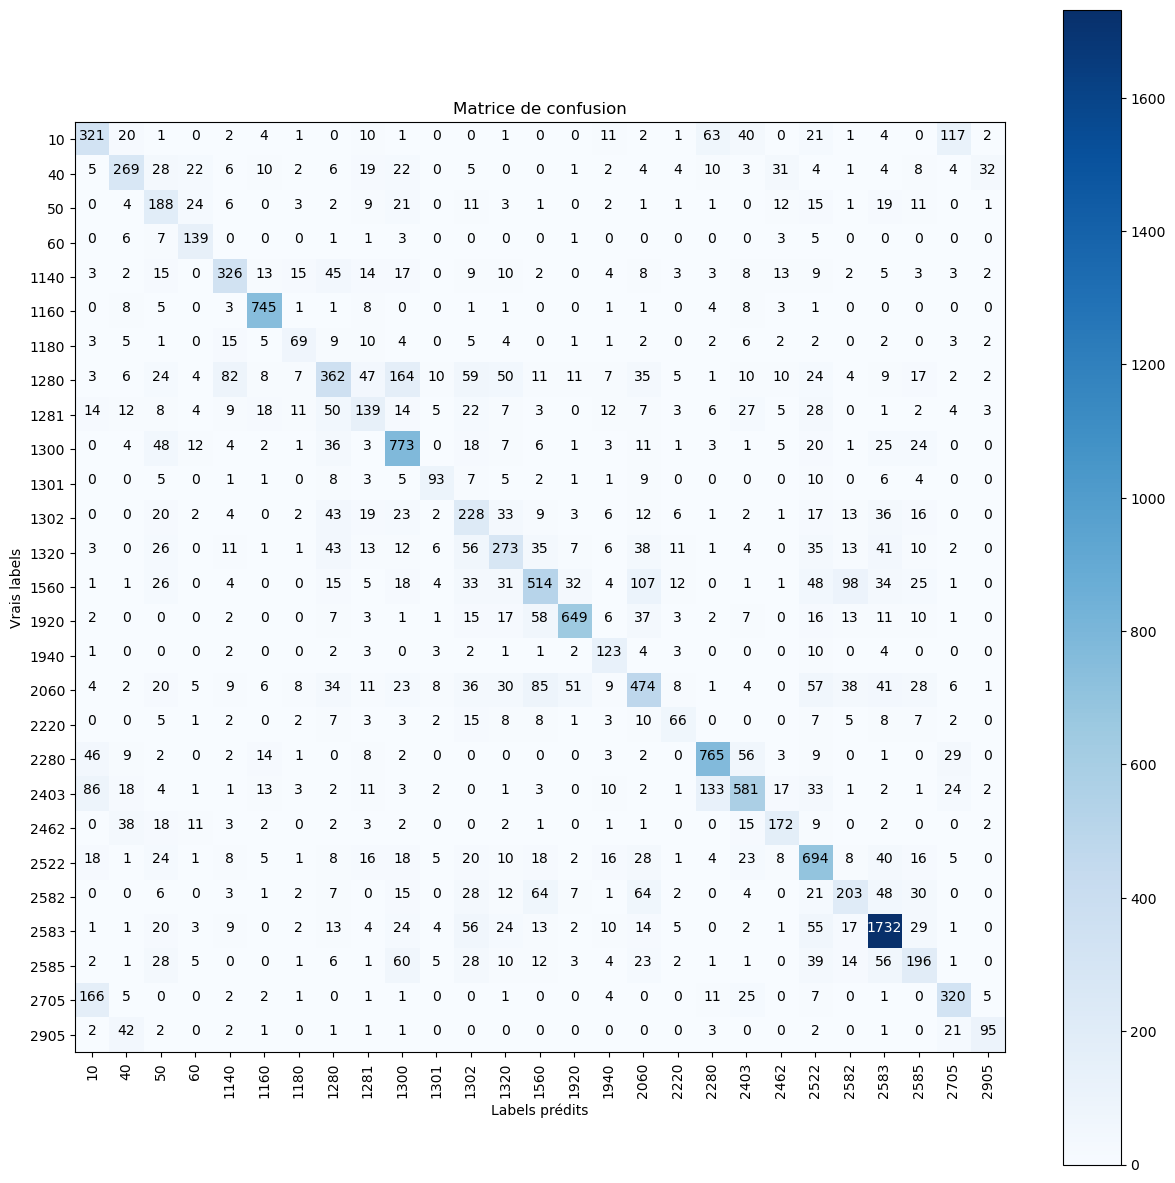

In [5]:
ds.show_confusion_matrix(y_orig, y_pred)

###  Modèle  Xception

#### Chargement des Modules Personnalisés
On ajoute un chemin vers les modules personnalisés (Bibli_DataScience_3_2, CNN_DataScience_2) pour charger des fonctions ou classes spécifiques nécessaires à l'analyse.

import Bibli_DataScience_3_2 as ds
import CNN_DataScience_2 as cnn
#import imp
#imp.reload(ds)
#imp.reload(cnn)

#### **Xception** : instanciation de DS_Xception

In [7]:
Xcep = cnn.DS_Xception("Xception")

DOSSIER_IMAGES_TRAIN
D:/Manuel/PROJET/Rakuten_Images_Classification_TensorFlow/data/images/image_train/
['D:/Manuel/PROJET/Rakuten_Images_Classification_TensorFlow/data/images/image_train/image_1263597046_product_3804725264.jpg']
Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 400, 400, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 199, 199, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                           

#### **Xception** : Lancement de l'entrainement
Récupération des Poids du Modèle, des précisions, des pertes et des prédictions.

In [8]:
train_acc,val_acc,tloss,tvalloss = Xcep.fit_modele(20,True,0,Train='Save')

newfit
Train_Test_Split_1
Train_Test_Split_ 
['D:/Manuel/PROJET/Rakuten_Images_Classification_TensorFlow/data/images/image_train/image_1263597046_product_3804725264.jpg']
Train_Test_Split_2 83256    1280
16434    2522
35273    2585
8620     2585
22499    1300
Name: prdtypecode, dtype: int64
(67932,)
(16984,)
Ramdom under sampling : MAX  5000
y :  (67932,)
Répartition :
{2583: 5000, 1560: 4058, 1300: 4036, 2060: 3994, 2522: 3991, 1280: 3896, 2403: 3819, 2280: 3808, 1920: 3442, 1160: 3162, 1320: 2593, 10: 2493, 2705: 2209, 1140: 2137, 2582: 2071, 40: 2006, 2585: 1997, 1302: 1993, 1281: 1656, 50: 1345, 2462: 1137, 2905: 698, 60: 666, 2220: 659, 1301: 646, 1940: 642, 1180: 611}
64765
64765
Ramdom over sampling : MIN  2000
Répartition :
{2583: 5000, 1560: 4058, 1300: 4036, 2060: 3994, 2522: 3991, 1280: 3896, 2403: 3819, 2280: 3808, 1920: 3442, 1160: 3162, 1320: 2593, 10: 2493, 2705: 2209, 1140: 2137, 2582: 2071, 40: 2006, 2585: 2000, 1302: 2000, 1281: 2000, 50: 2000, 2462: 2000, 2905: 2000,

#### **Xception** : Optionnel : Récupération des données

In [13]:
"""
train_acc,val_acc,tloss,tvalloss = Xcep.restore_fit_arrays()
y_orig,y_pred = Xcep.restore_predict_arrays()
df_pred = Xcep.restore_predict_dataframe()



"""


#### **Xception** : Affichage des precisions et des pertes par époque

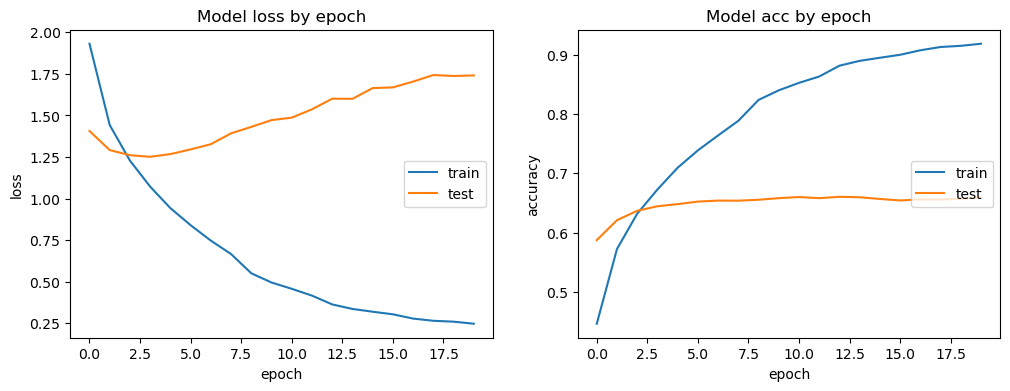

In [9]:
ds.plot_fit(train_acc,val_acc,tloss,tvalloss)

#### **Xception** : Affichage des 3 meilleurs prédictions par catégorie

In [10]:
df_pred = Xcep.get_df_pred()
df_pred

,Categorie,predict,pourc,predict2,pourc2,predict3,pourc3
0,10,10,0.452648,2705,0.255217,2280,0.107544
1,40,40,0.513944,2905,0.101594,2462,0.075697
2,50,50,0.479167,1300,0.125000,60,0.059524
3,60,60,0.837349,2462,0.048193,50,0.042169
4,1140,1140,0.668539,1280,0.089888,1180,0.033708
5,1160,1160,0.930468,1281,0.012642,2462,0.011378
6,1180,1180,0.496732,1140,0.091503,1280,0.071895
7,1280,1280,0.435318,1300,0.159138,1140,0.083162
8,1281,1281,0.340580,1280,0.154589,2403,0.077295
9,1300,1300,0.810704,1280,0.083251,50,0.014866


### **Xception** :  Évaluation des Prédictions - Rapport de classification
Ce rapport inclut des métriques comme la précision, le rappel (recall), le score F1 et le support pour chaque classe individuelle :  

1. Précision (**Precision**) : le nombre de positifs bien prédit (Vrai Positif) divisé par l’ensemble des positifs prédit (Vrai Positif + Faux Positif)
2. Rappel (**Recall**) : le nombre de positifs bien prédit (Vrai Positif) divisé par l’ensemble des positifs (Vrai Positif + Faux Négatif)
3. **Score F1** : La moyenne harmonique de la précision et du rappel, fournissant une évaluation relativement correct de la performance de notre modèle
4. **Support** : Le nombre d'occurrences réelles de chaque classe dans l'ensemble de test.

In [11]:
y_orig = Xcep.get_y_orig()
y_pred = Xcep.get_y_pred()
_,_ = ds.get_classification_report(y_orig, y_pred)

Précision de la prédiction: 65.92086669806876 %
Evaluation détaillée de la Classification par RDF :
 
               precision    recall  f1-score   support

          10       0.52      0.45      0.49       623
          40       0.67      0.51      0.58       502
          50       0.51      0.48      0.49       336
          60       0.70      0.84      0.76       166
        1140       0.62      0.67      0.64       534
        1160       0.92      0.93      0.93       791
        1180       0.60      0.50      0.54       153
        1280       0.48      0.44      0.46       974
        1281       0.43      0.34      0.38       414
        1300       0.68      0.81      0.74      1009
        1301       0.62      0.71      0.67       161
        1302       0.48      0.51      0.50       498
        1320       0.57      0.50      0.53       648
        1560       0.62      0.61      0.61      1015
        1920       0.82      0.80      0.81       861
        1940       0.76      0.7

#### **Xception** : Génération et Affichage de la Matrice de Confusion
1. La **matrice de confusion** fournit une représentation visuelle des performances du modèle, montrant non seulement les bonnes classifications  
mais aussi les erreurs (**faux positifs** et **faux négatifs**).  
2. En identifiant où le modèle a échoué (c.-à-d., les cellules non-diagonales de la matrice), on peut cibler les améliorations à apporter  
au modèle ou aux données d'entraînement.  
3. Analyser la matrice de confusion permet d'identifier des classes spécifiques qui sont souvent confondues, ce qui peut indiquer un besoin d'ajustement des caractéristiques d'entrée ou d'ajout de données supplémentaires pour ces classes.

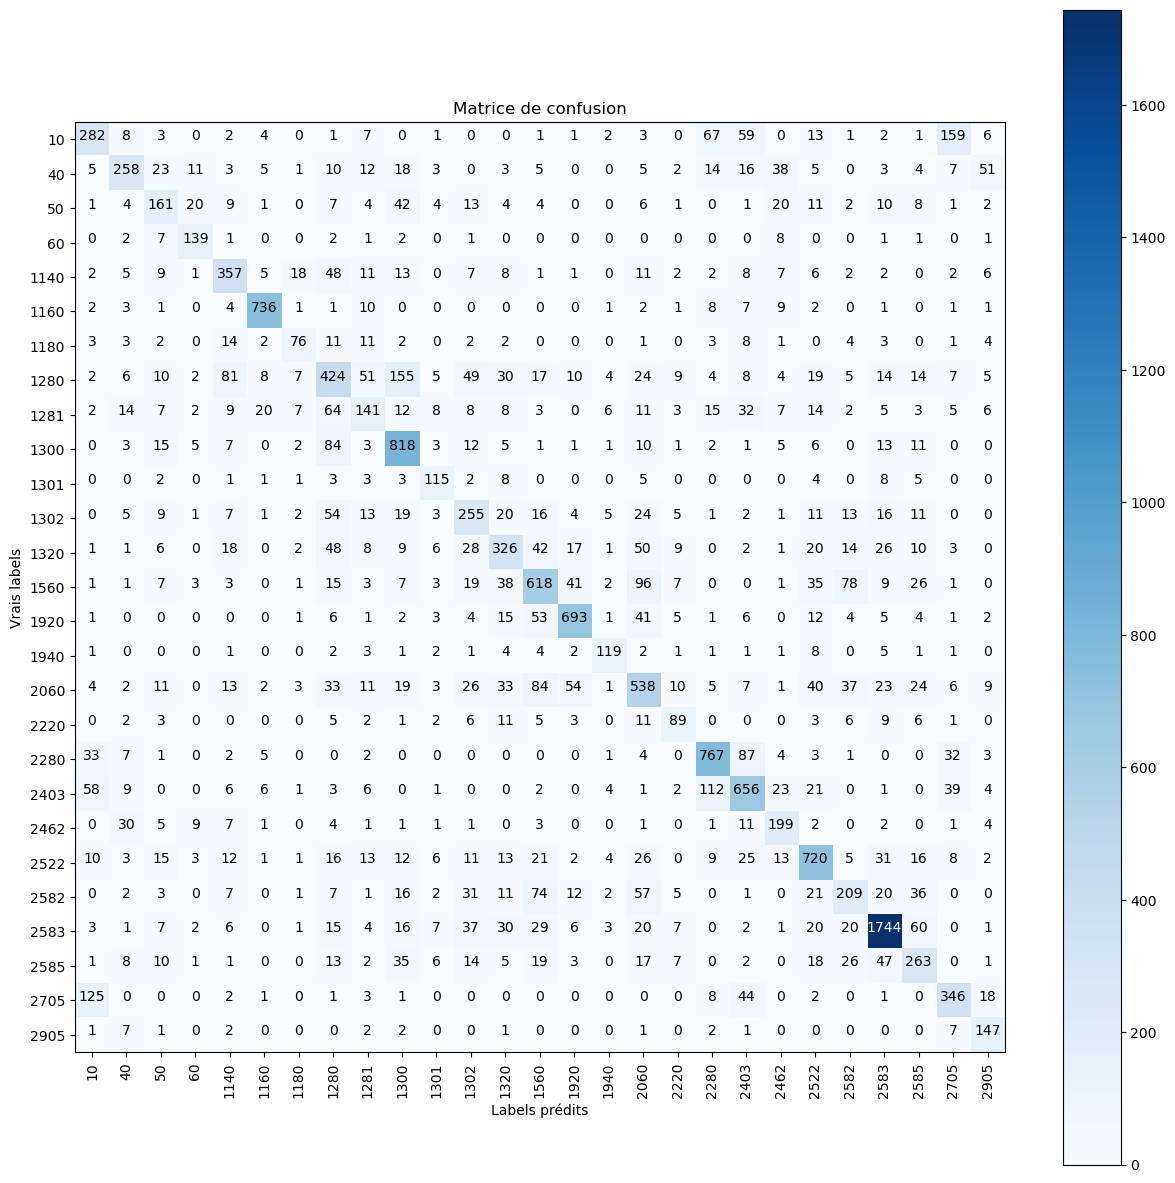

In [12]:
ds.show_confusion_matrix(y_orig, y_pred)